# Data Mining Project - Sustainability Around The World 
### Aradhya Mathur and Ozlem Gunes

## Simple and Multiple Linear Regression

In [1]:
#Importing Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import sklearn.metrics as mt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [2]:
#Reading dataset
factors = pd.read_csv('external_factors.csv')
factors.head()

,Country,Region,EPI,Population_2022,GDP_PC,GHS_Index,Life_Expectancy,Air,Water,Ecosystem,Climate,Env_Health,BHI,Biocapacity_PC,FC_PC
0,Afghanistan,Southern Asia,43.6,41128771,489.101348,28.8,62.879,15.5,28.1,36.9,65.6,16.0,41.9,0.37,0.003161
1,Albania,Eastern Europe,47.1,2842321,6424.342465,45.0,76.833,37.5,54.1,45.5,52.5,40.0,34.8,0.99,0.009499
2,Algeria,Greater Middle East,29.6,44903225,3741.003942,26.2,77.129,39.4,53.3,31.6,20.9,42.0,59.7,0.50,0.009532
3,Angola,Sub-Saharan Africa,30.5,35588987,2038.467285,29.1,61.929,23.1,12.8,28.6,37.7,20.5,40.2,1.87,0.003990
4,Antigua and Barbuda,Latin America & Caribbean,52.4,98728,14900.797400,30.0,79.236,56.5,50.1,43.6,60.2,55.8,34.0,0.83,0.001688


<AxesSubplot:>

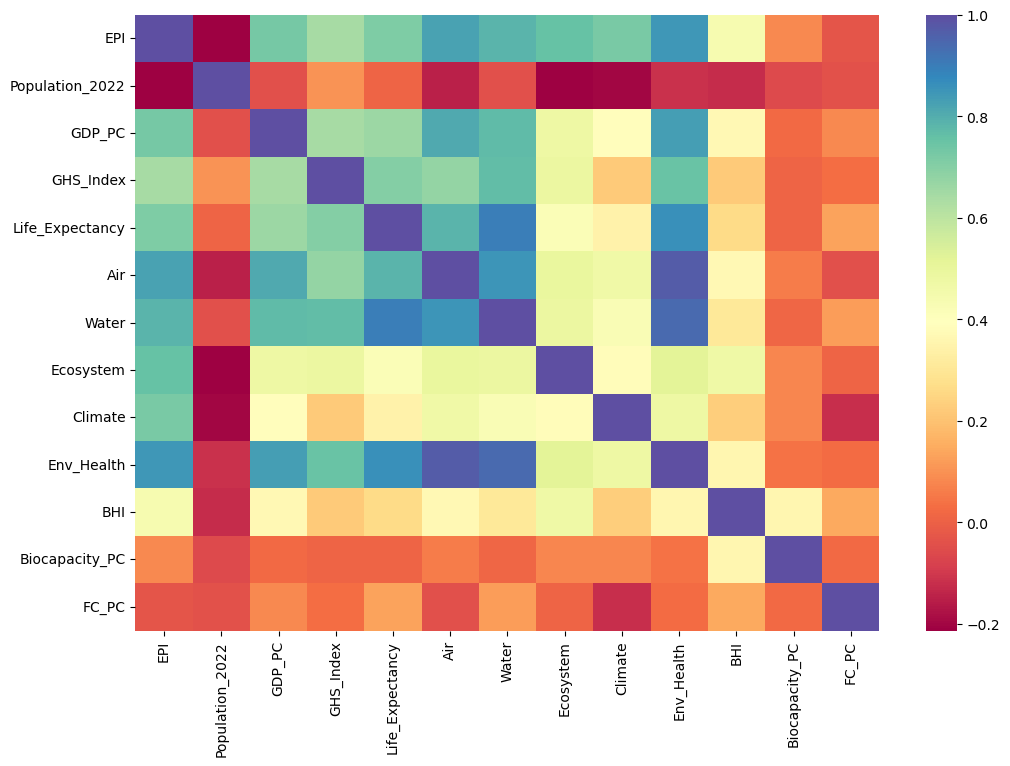

In [3]:
#Heatmap for external factors and EPI
plt.figure(figsize = (12,8))
sns.heatmap(factors.corr(), cmap="Spectral")

                            OLS Regression Results                            
Dep. Variable:                    EPI   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     186.4
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           6.27e-29
Time:                        15:22:12   Log-Likelihood:                -609.76
No. Observations:                 168   AIC:                             1224.
Df Residuals:                     166   BIC:                             1230.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0659      0.870     41.472      0.0

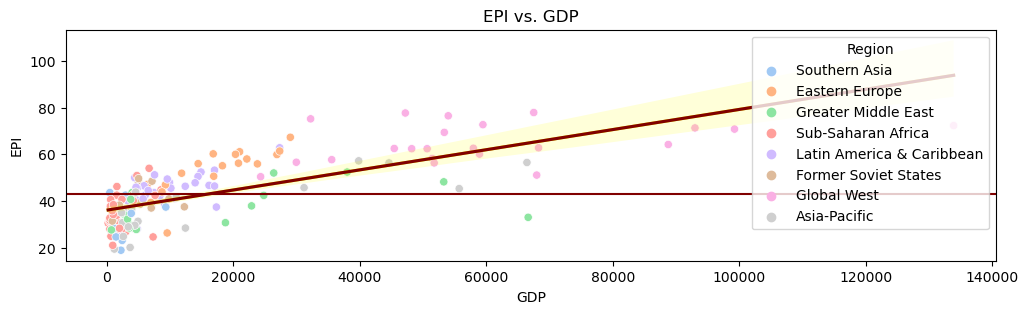

SpearmanrResult(correlation=0.7781825131823187, pvalue=2.3129598993934406e-35)

In [4]:
#EPI vs GDP 
x_train = factors[['GDP_PC']]
y_train = factors['EPI']
x_test = factors[['GDP_PC']]
y_test = factors['EPI']

x_train = sm.add_constant(x_train) 
model = sm.OLS(y_train, x_train).fit()
predictions_train = model.predict(x_train) 
print_model = model.summary()
print(print_model)
#Plotting
fig = plt.figure(figsize=(12,3))
sns.scatterplot(y=factors.EPI, x=factors.GDP_PC, hue=factors.Region, legend='full', palette = 'pastel') 
sns.regplot(data=factors, y=factors.EPI, x=factors.GDP_PC, ax=fig.gca(), scatter = False, ci = 95, fit_reg = True, color = 'yellow') 
sns.regplot(data=factors, y=factors.EPI, x=factors.GDP_PC, ax=fig.gca(), scatter = False, ci = 0, fit_reg = True, color = 'maroon')
plt.axhline(factors['EPI'].mean(), color='maroon')
plt.title("EPI vs. GDP")
plt.xlabel('GDP')
plt.ylabel('EPI')
plt.show()
#Correlation
x = factors.EPI
y = factors.GDP_PC
stats.spearmanr(x,y)

                            OLS Regression Results                            
Dep. Variable:                    EPI   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     172.4
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.85e-27
Time:                        15:22:13   Log-Likelihood:                -613.16
No. Observations:                 168   AIC:                             1230.
Df Residuals:                     166   BIC:                             1237.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -45.0233      6.741     

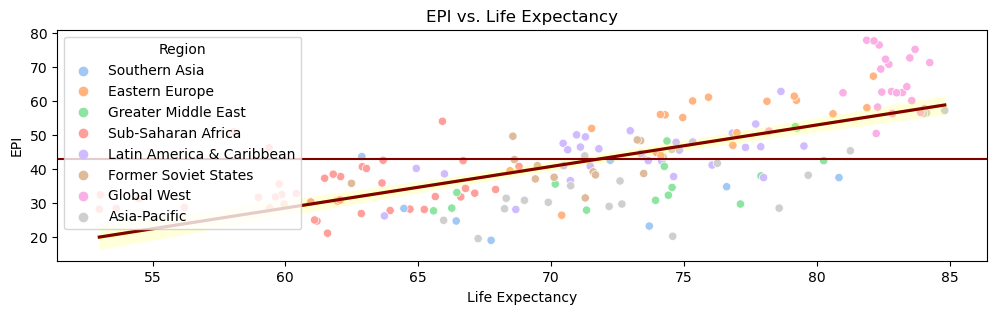

SpearmanrResult(correlation=0.7238613414141891, pvalue=1.487683365074239e-28)

In [5]:
#EPI vs Life_Expectancy
x_train = factors[['Life_Expectancy']]
y_train = factors['EPI']
x_test = factors[['Life_Expectancy']]
y_test = factors['EPI']

x_train = sm.add_constant(x_train) 
model = sm.OLS(y_train, x_train).fit()
predictions_train = model.predict(x_train) 
print_model = model.summary()
print(print_model)
#Plotting
fig = plt.figure(figsize=(12,3))
sns.scatterplot(y=factors.EPI, x=factors.Life_Expectancy, hue=factors.Region, legend='full', palette = 'pastel') 
sns.regplot(data=factors, y=factors.EPI, x=factors.Life_Expectancy, ax=fig.gca(), scatter = False, ci = 95, fit_reg = True, color = 'yellow') 
sns.regplot(data=factors, y=factors.EPI, x=factors.Life_Expectancy, ax=fig.gca(), scatter = False, ci = 0, fit_reg = True, color = 'maroon')
plt.axhline(factors['EPI'].mean(), color='maroon')
plt.title("EPI vs. Life Expectancy")
plt.xlabel('Life Expectancy')
plt.ylabel('EPI')
plt.show()
#Correlation
x = factors.EPI
y = factors.Life_Expectancy
stats.spearmanr(x,y)

                            OLS Regression Results                            
Dep. Variable:                    EPI   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     115.6
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           8.57e-21
Time:                        15:22:13   Log-Likelihood:                -628.59
No. Observations:                 168   AIC:                             1261.
Df Residuals:                     166   BIC:                             1267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.1410      2.529      6.778      0.0

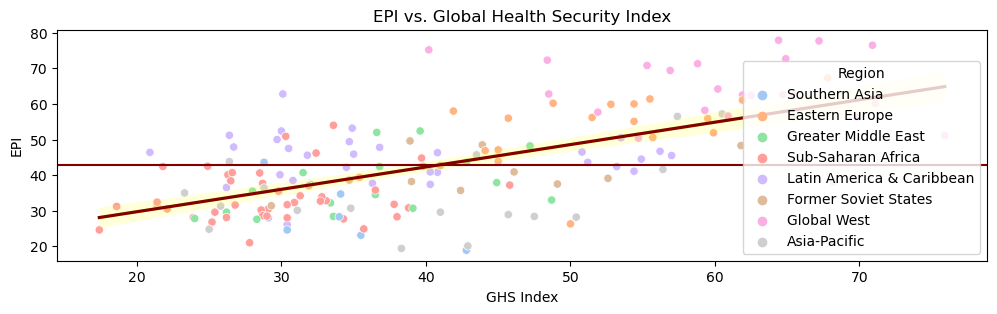

SpearmanrResult(correlation=0.6028575893932931, pvalue=5.313985829190582e-18)

In [6]:
#EPI vs GHS Index
x_train = factors[['GHS_Index']]
y_train = factors['EPI']
x_test = factors[['GHS_Index']]
y_test = factors['EPI']

x_train = sm.add_constant(x_train) 
model = sm.OLS(y_train, x_train).fit()
predictions_train = model.predict(x_train) 
print_model = model.summary()
print(print_model)
#Plotting
fig = plt.figure(figsize=(12,3))
sns.scatterplot(y=factors.EPI, x=factors.GHS_Index, hue=factors.Region, legend='full', palette = 'pastel') 
sns.regplot(data=factors, y=factors.EPI, x=factors.GHS_Index, ax=fig.gca(), scatter = False, ci = 95, fit_reg = True, color = 'yellow') 
sns.regplot(data=factors, y=factors.EPI, x=factors.GHS_Index, ax=fig.gca(), scatter = False, ci = 0, fit_reg = True, color = 'maroon')
plt.axhline(factors['EPI'].mean(), color='maroon')
plt.title("EPI vs. Global Health Security Index")
plt.xlabel('GHS Index')
plt.ylabel('EPI')
plt.show()
#Correlation
x = factors.EPI
y = factors.GHS_Index
stats.spearmanr(x,y)

                            OLS Regression Results                            
Dep. Variable:                    EPI   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     39.93
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           2.33e-09
Time:                        15:22:14   Log-Likelihood:                -654.87
No. Observations:                 168   AIC:                             1314.
Df Residuals:                     166   BIC:                             1320.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.2386      3.867      4.976      0.0

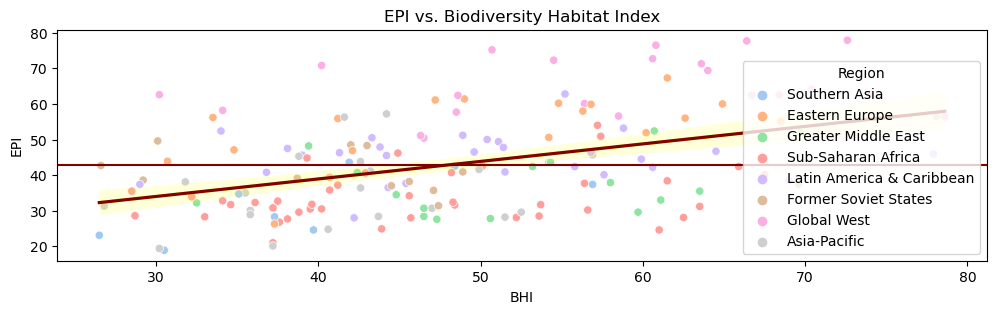

SpearmanrResult(correlation=0.41239376268679917, pvalue=2.7835796323273694e-08)

In [7]:
#EPI vs BHI
x_train = factors[['BHI']]
y_train = factors['EPI']
x_test = factors[['BHI']]
y_test = factors['EPI']

x_train = sm.add_constant(x_train) 
model = sm.OLS(y_train, x_train).fit()
predictions_train = model.predict(x_train) 
print_model = model.summary()
print(print_model)
#Plotting
fig = plt.figure(figsize=(12,3))
sns.scatterplot(y=factors.EPI, x=factors.BHI, hue=factors.Region, legend='full', palette = 'pastel') 
sns.regplot(data=factors, y=factors.EPI, x=factors.BHI, ax=fig.gca(), scatter = False, ci = 95, fit_reg = True, color = 'yellow') 
sns.regplot(data=factors, y=factors.EPI, x=factors.BHI, ax=fig.gca(), scatter = False, ci = 0, fit_reg = True, color = 'maroon')
plt.axhline(factors['EPI'].mean(), color='maroon')
plt.title("EPI vs. Biodiversity Habitat Index")
plt.xlabel('BHI')
plt.ylabel('EPI')
plt.show()
#Correlation
x = factors.EPI
y = factors.BHI
stats.spearmanr(x,y)

                            OLS Regression Results                            
Dep. Variable:                    EPI   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     7.578
Date:                Sun, 11 Dec 2022   Prob (F-statistic):            0.00657
Time:                        15:22:15   Log-Likelihood:                -669.23
No. Observations:                 168   AIC:                             1342.
Df Residuals:                     166   BIC:                             1349.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              43.7600      1.050     

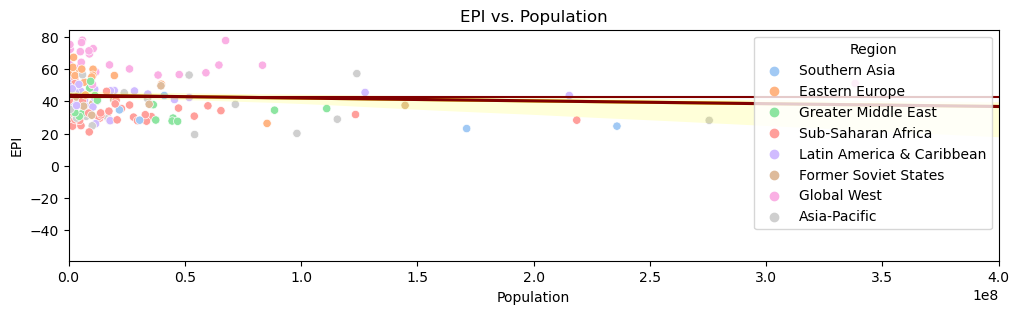

SpearmanrResult(correlation=-0.2924976763612847, pvalue=0.00011938583848988639)

In [8]:
#EPI vs Population
x_train = factors[['Population_2022']]
y_train = factors['EPI']
x_test = factors[['Population_2022']]
y_test = factors['EPI']

x_train = sm.add_constant(x_train) 
model = sm.OLS(y_train, x_train).fit()
predictions_train = model.predict(x_train) 
print_model = model.summary()
print(print_model)
#Plotting
fig = plt.figure(figsize=(12,3))
sns.scatterplot(y=factors.EPI, x=factors.Population_2022, hue=factors.Region, legend='full', palette = 'pastel') 
sns.regplot(data=factors, y=factors.EPI, x=factors.Population_2022, ax=fig.gca(), scatter = False, ci = 95, fit_reg = True, color = 'yellow') 
sns.regplot(data=factors, y=factors.EPI, x=factors.Population_2022, ax=fig.gca(), scatter = False, ci = 0, fit_reg = True, color = 'maroon')
plt.axhline(factors['EPI'].mean(), color='maroon')
plt.title("EPI vs. Population")
plt.xlabel('Population')
plt.ylabel('EPI')
plt.xlim(0, 400000000)
plt.show()
#Correlation
x = factors.EPI
y = factors.Population_2022
stats.spearmanr(x,y)

                            OLS Regression Results                            
Dep. Variable:             Env_Health   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     466.8
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           4.19e-50
Time:                        15:22:15   Log-Likelihood:                -644.03
No. Observations:                 168   AIC:                             1292.
Df Residuals:                     166   BIC:                             1298.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -130.3468      8.100    -

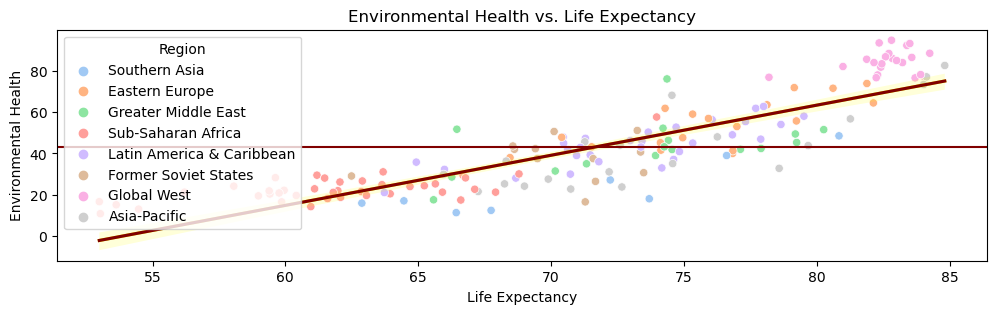

SpearmanrResult(correlation=0.8791698145428337, pvalue=2.547680881811889e-55)

In [9]:
#Environmental Health vs Life_Expectancy
x_train = factors[['Life_Expectancy']]
y_train = factors['Env_Health']
x_test = factors[['Life_Expectancy']]
y_test = factors['Env_Health']

x_train = sm.add_constant(x_train) 
model = sm.OLS(y_train, x_train).fit()
predictions_train = model.predict(x_train) 
print_model = model.summary()
print(print_model)
#Plotting
fig = plt.figure(figsize=(12,3))
sns.scatterplot(y=factors.Env_Health, x=factors.Life_Expectancy, hue=factors.Region, legend='full', palette = 'pastel') 
sns.regplot(data=factors, y=factors.Env_Health, x=factors.Life_Expectancy, ax=fig.gca(), scatter = False, ci = 95, fit_reg = True, color = 'yellow') 
sns.regplot(data=factors, y=factors.Env_Health, x=factors.Life_Expectancy, ax=fig.gca(), scatter = False, ci = 0, fit_reg = True, color = 'maroon')
plt.axhline(factors['EPI'].mean(), color='maroon')
plt.title("Environmental Health vs. Life Expectancy")
plt.xlabel('Life Expectancy')
plt.ylabel('Environmental Health')
plt.show()
#Correlation
x = factors.Env_Health
y = factors.Life_Expectancy
stats.spearmanr(x,y)

                            OLS Regression Results                            
Dep. Variable:                  Water   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     683.7
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           9.52e-61
Time:                        15:22:16   Log-Likelihood:                -663.17
No. Observations:                 168   AIC:                             1330.
Df Residuals:                     166   BIC:                             1337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -187.3841      9.078    -

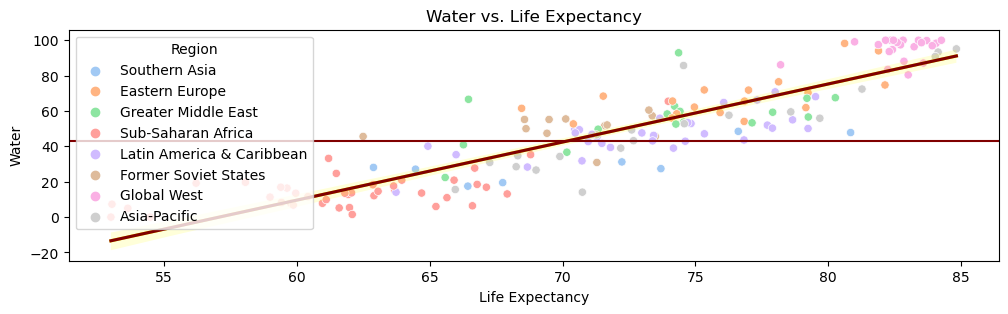

SpearmanrResult(correlation=0.8984046821748846, pvalue=3.265359668561759e-61)

In [10]:
#Water vs Life_Expectancy
x_train = factors[['Life_Expectancy']]
y_train = factors['Water']
x_test = factors[['Life_Expectancy']]
y_test = factors['Water']

x_train = sm.add_constant(x_train) 
model = sm.OLS(y_train, x_train).fit()
predictions_train = model.predict(x_train) 
print_model = model.summary()
print(print_model)
#Plotting
fig = plt.figure(figsize=(12,3))
sns.scatterplot(y=factors.Water, x=factors.Life_Expectancy, hue=factors.Region, legend='full', palette = 'pastel')
sns.regplot(data=factors, y=factors.Water, x=factors.Life_Expectancy, ax=fig.gca(), scatter = False, ci = 95, fit_reg = True, color = 'yellow') 
sns.regplot(data=factors, y=factors.Water, x=factors.Life_Expectancy, ax=fig.gca(), scatter = False, ci = 0, fit_reg = True, color = 'maroon')
plt.axhline(factors['EPI'].mean(), color='maroon')
plt.title("Water vs. Life Expectancy")
plt.xlabel('Life Expectancy')
plt.ylabel('Water')
plt.show()
#Correlation
x = factors.Water
y = factors.Life_Expectancy
stats.spearmanr(x,y)

                            OLS Regression Results                            
Dep. Variable:                  FC_PC   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.3127
Date:                Sun, 11 Dec 2022   Prob (F-statistic):              0.577
Time:                        15:22:16   Log-Likelihood:                 451.32
No. Observations:                 168   AIC:                            -898.6
Df Residuals:                     166   BIC:                            -892.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0108      0.003      3.884      0.0

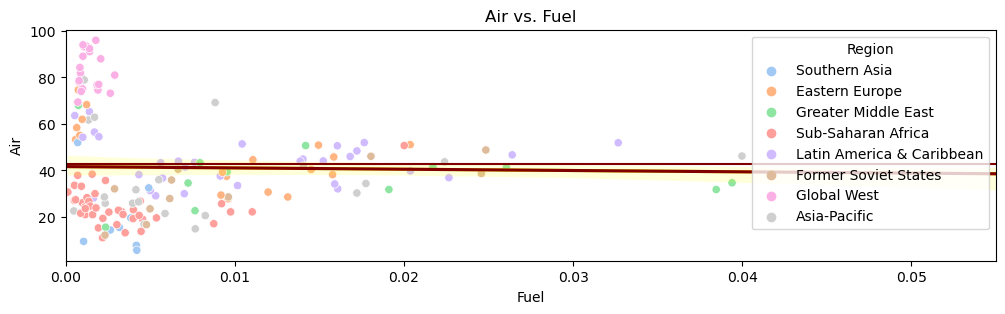

SpearmanrResult(correlation=-0.10478415255054824, pvalue=0.17645787539869248)

In [11]:
#Fuel_PC vs Air
x_train = factors[['Air']]
y_train = factors['FC_PC']
x_test = factors[['Air']]
y_test = factors['FC_PC']

x_train = sm.add_constant(x_train) 
model = sm.OLS(y_train, x_train).fit()
predictions_train = model.predict(x_train) 
print_model = model.summary()
print(print_model)
#Plotting
fig = plt.figure(figsize=(12,3))
sns.scatterplot(y=factors.Air, x=factors.FC_PC, hue=factors.Region, legend='full', palette = 'pastel') 
sns.regplot(data=factors, y=factors.Air, x=factors.FC_PC, ax=fig.gca(), scatter = False, ci = 95, fit_reg = True, color = 'yellow') 
sns.regplot(data=factors, y=factors.Air, x=factors.FC_PC, ax=fig.gca(), scatter = False, ci = 0, fit_reg = True, color = 'maroon')
plt.axhline(factors['EPI'].mean(), color='maroon')
plt.title("Air vs. Fuel")
plt.xlabel('Fuel')
plt.xlim(0, 0.055)
plt.ylabel('Air')
plt.show()
#Correlation
x = factors.FC_PC
y = factors.Air
stats.spearmanr(x,y)

## Multiple Linear Regression

In [12]:
#MLR for(Life Expectancy,GHS Index,GDP PC,BHI) and EPI.
x_train = factors[['Life_Expectancy', 'GHS_Index', 'GDP_PC','BHI']]
y_train = factors['EPI']
x_test = factors[['Life_Expectancy', 'GHS_Index', 'GDP_PC','BHI']]
y_test = factors['EPI']
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
predictions_train = model.predict(x_train) 
print_model = model.summary()
print(print_model)
x_test = sm.add_constant(x_test, has_constant='add')
predictions = model.predict(x_test) 
mt.r2_score(y_test, predictions)

                            OLS Regression Results                            
Dep. Variable:                    EPI   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     81.14
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           9.18e-38
Time:                        15:22:17   Log-Likelihood:                -580.95
No. Observations:                 168   AIC:                             1172.
Df Residuals:                     163   BIC:                             1188.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -17.9789      7.580     

0.6656692594960063

In [13]:
#MLR for (Air quality and Water Quality ) and Life Expectancy
x_train = factors[['Air', 'Water']]
y_train = factors['Life_Expectancy']
x_test = factors[['Air', 'Water']]
y_test = factors['Life_Expectancy']
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
predictions_train = model.predict(x_train) 
print_model = model.summary()
print(print_model)
x_test = sm.add_constant(x_test, has_constant='add')
predictions = model.predict(x_test) 
mt.r2_score(y_test, predictions)

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     344.6
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.22e-59
Time:                        15:22:17   Log-Likelihood:                -444.23
No. Observations:                 168   AIC:                             894.5
Df Residuals:                     165   BIC:                             903.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.6373      0.577    103.291      0.0

0.8068408628799345

## Observations

1) Positive strong correlation between EPI and GDP <br>
2) Positive strong correlation between EPI and Life Expectancy <br>
3) Positive correlation between EPI and GHS Index <br>
4) Positive correlation between EPI and Biodiversity Habitat Index <br>
5) Negative correlation between EPI and Population <br>
6) Negative correlation between Fuel Consumption Per Capita and Air Quality <br>
7) Positive strong correlation between Environment Health and Life_Expectancy <br>
8) Positive strong correlation between Water and Life_Expectancy <br>
9) Using Multiple Linear Regression, a strong correlation was found between (Life Expectancy,GHS Index,GDP PC,BHI) and EPI. <br>
10) Using Multiple Linear Regression, a very strong correlation was found between (Air quality and Water Quality ) and Life Expectancy 
<br>


